In [30]:
from tqdm import tqdm
import os
import numpy as np
from scipy.special import comb
from itertools import combinations

def calculate_stability_metric(prediction_changes):
    # Calculate combinations count
    K = comb(len(prediction_changes), 2)
    
    # Calculate the stability metric
    if K == 0:
        stability_metric = 0
    else:
        stability_metric = 0
        for i, j in combinations(range(len(prediction_changes)), 2):
            stability_metric += abs(prediction_changes[i] - prediction_changes[j])
        stability_metric /= K
    
    return stability_metric

# Initialize a dictionary to store prediction change values for each method
prediction_changes = {}

# Root directory where 'similarity_metrics.npy' files are stored
root_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked"

# Iterate through each subfolder to read 'similarity_metrics.npy' files
for subfolder in tqdm(os.listdir(root_folder)):
    subfolder_path = os.path.join(root_folder, subfolder)
    
    if os.path.isdir(subfolder_path):
        npy_file_path = os.path.join(subfolder_path, 'similarity_metrics.npy')
        
        if os.path.exists(npy_file_path):
            # Load the .npy file
            metrics = np.load(npy_file_path, allow_pickle=True).item()
            print(f"Metrics for {subfolder}: {metrics.keys()}")  # Debug print
            
            # Get the prediction change value for top 1
            prediction_change_top_1 = metrics.get("Prediction_Change_Top1", None)  # Change the key name to match
            print(f"Prediction Change for {subfolder}: {prediction_change_top_1}")  # Debug print
            
            if prediction_change_top_1 is not None:
                prediction_changes[subfolder] = prediction_change_top_1

# Convert prediction_changes to a list
prediction_change_values = list(prediction_changes.values())

# Calculate the stability metric
stability_metric = calculate_stability_metric(prediction_change_values)

print(f"Stability Metric f_d^K: {stability_metric}")


100%|██████████| 23/23 [00:00<00:00, 5541.33it/s]

Metrics for ILSVRC2012_val_00028042: dict_keys(['Jaccard_Top_1', 'Dice_Top_1', 'Cosine_Top_1', 'Euclidean_Top_1', 'KL_Top_1', 'Weighted_Jaccard_Top_1', 'Weighted_Jaccard_Top_5', 'Weighted_Jaccard_Top_10', 'Weighted_Jaccard_Top_50', 'Prediction_Change_Top1', 'Prediction_Change_Percentage_Top1', 'Jaccard_Top_5', 'Dice_Top_5', 'Cosine_Top_5', 'Euclidean_Top_5', 'KL_Top_5', 'Jaccard_Top_10', 'Dice_Top_10', 'Cosine_Top_10', 'Euclidean_Top_10', 'KL_Top_10', 'Jaccard_Top_50', 'Dice_Top_50', 'Cosine_Top_50', 'Euclidean_Top_50', 'KL_Top_50'])
Prediction Change for ILSVRC2012_val_00028042: 1.9882115125656128
Metrics for ILSVRC2012_val_00028157: dict_keys(['Jaccard_Top_1', 'Dice_Top_1', 'Cosine_Top_1', 'Euclidean_Top_1', 'KL_Top_1', 'Weighted_Jaccard_Top_1', 'Weighted_Jaccard_Top_5', 'Weighted_Jaccard_Top_10', 'Weighted_Jaccard_Top_50', 'Prediction_Change_Top1', 'Prediction_Change_Percentage_Top1', 'Jaccard_Top_5', 'Dice_Top_5', 'Cosine_Top_5', 'Euclidean_Top_5', 'KL_Top_5', 'Jaccard_Top_10', 'Di

[1.9882115, 0.5088701, 0.3170117, 2.9088304, 0, 0.49986696, 0, 0, 0.084058285, 0.7111651, 1.7909862, 0, 0.42220294, 0.7879396, 0, 0.46621394, 0, 0, 1.6129315, 1.0899585, 3.5984583, 0.36455858, 0]


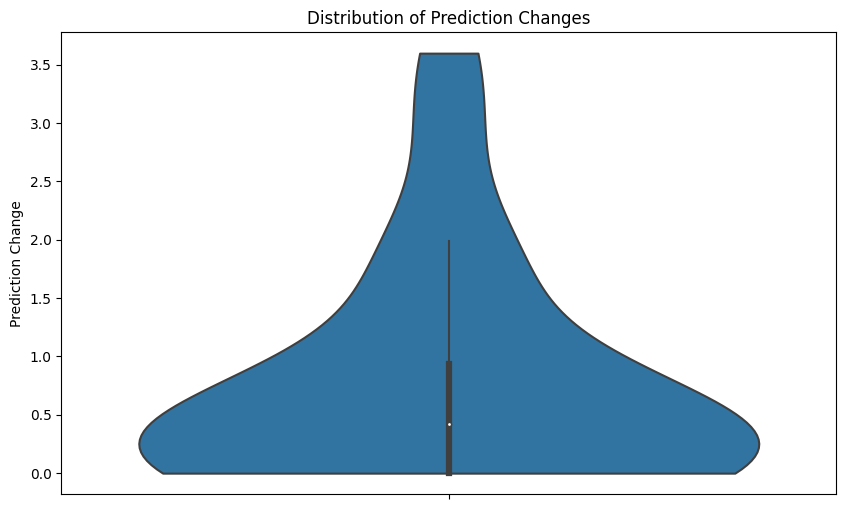

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert prediction_changes to a list
prediction_change_values = list(prediction_changes.values())
print(prediction_change_values)
# Prepare data for plotting
df = pd.DataFrame({"Prediction Change": prediction_change_values})

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(y="Prediction Change", data=df, cut=0)
plt.title("Distribution of Prediction Changes")
plt.show()


In [22]:
# from tqdm import tqdm
# import os
# import numpy as np
# from scipy.special import comb
# from itertools import combinations

# def calculate_consistency_metric(prediction_changes_xai, prediction_changes_all):
#     m = len(prediction_changes_all)
    
#     # Initialize the consistency metric
#     fdX = 0
    
#     for xi in prediction_changes_all:
#         fdX += abs(prediction_changes_xai - xi)
        
#     # Calculate the Explanation Consistency
#     fdX /= (m - 1) if (m - 1) != 0 else 1  # Prevent division by zero
    
#     return fdX

# # Initialize dictionaries to store prediction change values
# prediction_changes_xai_method = {}
# prediction_changes_all_methods = {}

# # File directories where 'similarity_metrics.npy' files are stored
# xai_method_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked" # Replace with the actual path
# all_methods_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/all"  # Replace with the actual path

# # Read 'similarity_metrics.npy' files for the specific XAI method
# for subfolder in tqdm(os.listdir(xai_method_folder)):
#     subfolder_path = os.path.join(xai_method_folder, subfolder)
    
#     if os.path.isdir(subfolder_path):
#         npy_file_path = os.path.join(subfolder_path, 'similarity_metrics.npy')
        
#         if os.path.exists(npy_file_path):
#             metrics = np.load(npy_file_path, allow_pickle=True).item()
#             prediction_change_top1 = metrics.get("Prediction_Change_Top1", None)
            
#             if prediction_change_top1 is not None:
#                 prediction_changes_xai_method[subfolder] = prediction_change_top1

# # Read 'similarity_metrics.npy' files for all XAI methods
# for subfolder in tqdm(os.listdir(all_methods_folder)):
#     subfolder_path = os.path.join(all_methods_folder, subfolder)
    
#     if os.path.isdir(subfolder_path):
#         npy_file_path = os.path.join(subfolder_path, 'similarity_metrics.npy')
        
#         if os.path.exists(npy_file_path):
#             metrics = np.load(npy_file_path, allow_pickle=True).item()
#             prediction_change_top1 = metrics.get("Prediction_Change_Top1", None)
            
#             if prediction_change_top1 is not None:
#                 prediction_changes_all_methods[subfolder] = prediction_change_top1

# # Convert to lists
# prediction_changes_xai_list = list(prediction_changes_xai_method.values())
# prediction_changes_all_list = list(prediction_changes_all_methods.values())

# # Calculate the consistency metric
# consistency_metric = calculate_consistency_metric(np.mean(prediction_changes_xai_list), prediction_changes_all_list)

# print(f"Explanation Consistency f_d^X: {consistency_metric}")


100%|██████████| 3/3 [00:00<00:00, 28212.81it/s]

Explanation Consistency f_d^X: -0.0


100%|██████████| 23/23 [00:00<00:00, 3476.74it/s]

Explanation Consistency f_d^X: 0.0


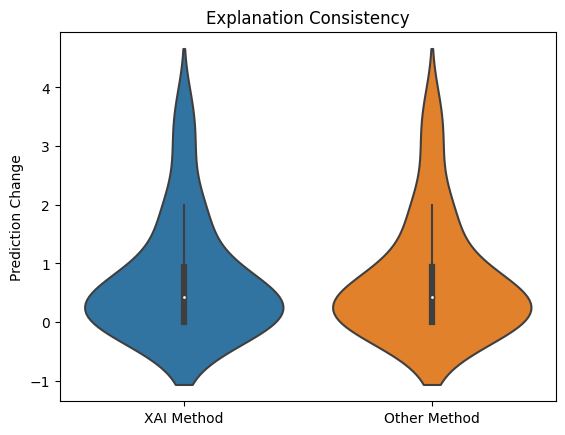

In [25]:
from tqdm import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_consistency_metric(xai_method_changes, other_method_changes):
    # Calculate the consistency metric
    m = len(xai_method_changes)
    if m == 0:
        return 0
    consistency_metric = sum(abs(xai_method_changes[i] - other_method_changes[i]) for i in range(m)) / m
    return consistency_metric

# Initialize lists to store prediction change values for each method
xai_method_changes = []
other_method_changes = []

# Folders where 'similarity_metrics.npy' files are stored for two different XAI methods
xai_method_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/all/masked"  # Replace with the actual path
other_method_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/all/masked"  # Replace with the actual path

# Assuming subfolders are the same in both xai_method_folder and other_method_folder
for subfolder in tqdm(os.listdir(xai_method_folder)):
    xai_npy_file_path = os.path.join(xai_method_folder, subfolder, 'similarity_metrics.npy')
    other_npy_file_path = os.path.join(other_method_folder, subfolder, 'similarity_metrics.npy')
    
    if os.path.exists(xai_npy_file_path) and os.path.exists(other_npy_file_path):
        # Load the .npy files
        xai_metrics = np.load(xai_npy_file_path, allow_pickle=True).item()
        other_metrics = np.load(other_npy_file_path, allow_pickle=True).item()
        
        # Get the prediction change value for top 1
        xai_prediction_change = xai_metrics.get("Prediction_Change_Top1", None)
        other_prediction_change = other_metrics.get("Prediction_Change_Top1", None)
        
        if xai_prediction_change is not None and other_prediction_change is not None:
            xai_method_changes.append(xai_prediction_change)
            other_method_changes.append(other_prediction_change)

# Calculate the consistency metric
consistency_metric = calculate_consistency_metric(xai_method_changes, other_method_changes)

print(f"Explanation Consistency f_d^X: {consistency_metric}")

# Create a violin plot
data_to_plot = [xai_method_changes, other_method_changes]
sns.violinplot(data=data_to_plot)
plt.xticks([0, 1], ['XAI Method', 'Other Method'])
plt.ylabel('Prediction Change')
plt.title('Explanation Consistency')
plt.show()


100%|██████████| 23/23 [00:00<00:00, 6390.79it/s]

Explanation Consistency f_d^X: 0.0


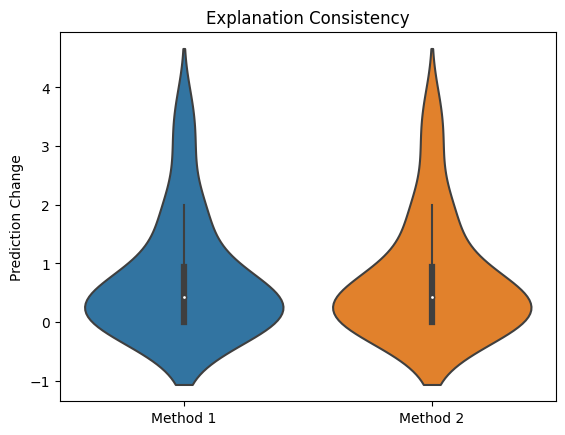

In [28]:
# Code to calculate Explanation Consistency and plot violin charts for two XAI methods

from tqdm import tqdm
import os
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_consistency_metric(method_1_changes, method_2_changes):
    # Number of summaries
    m = len(method_1_changes)
    
    # Calculate the consistency metric
    if m <= 1:
        consistency_metric = 0
    else:
        consistency_metric = 0
        for i in range(m):
            consistency_metric += abs(method_1_changes[i] - method_2_changes[i])
        consistency_metric /= (m - 1)
    
    return consistency_metric

def plot_violin(data, labels, title):
    sns.violinplot(data=data)
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel('Prediction Change')
    plt.show()

# Initialize dictionaries to store prediction change values for each method
method_1_changes = {}
method_2_changes = {}

# Directories where 'similarity_metrics.npy' files are stored for each XAI method
xai_method_1_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/all/masked"  # Replace with the actual path
xai_method_2_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/all/masked"  # Replace with the actual path

# Load prediction change values for Method 1
for subfolder in tqdm(os.listdir(xai_method_1_folder)):
    subfolder_path = os.path.join(xai_method_1_folder, subfolder)
    
    if os.path.isdir(subfolder_path):
        npy_file_path = os.path.join(subfolder_path, 'similarity_metrics.npy')
        
        if os.path.exists(npy_file_path):
            metrics = np.load(npy_file_path, allow_pickle=True).item()
            prediction_change_top_1 = metrics.get("Prediction_Change_Top1", None)
            
            if prediction_change_top_1 is not None:
                method_1_changes[subfolder] = prediction_change_top_1

# Load prediction change values for Method 2
for subfolder in tqdm(os.listdir(xai_method_2_folder)):
    subfolder_path = os.path.join(xai_method_2_folder, subfolder)
    
    if os.path.isdir(subfolder_path):
        npy_file_path = os.path.join(subfolder_path, 'similarity_metrics.npy')
        
        if os.path.exists(npy_file_path):
            metrics = np.load(npy_file_path, allow_pickle=True).item()
            prediction_change_top_1 = metrics.get("Prediction_Change_Top1", None)
            
            if prediction_change_top_1 is not None:
                method_2_changes[subfolder] = prediction_change_top_1

# Convert to lists and filter by common subfolders
common_subfolders = set(method_1_changes.keys()).intersection(set(method_2_changes.keys()))
method_1_values = [method_1_changes[subfolder] for subfolder in common_subfolders]
method_2_values = [method_2_changes[subfolder] for subfolder in common_subfolders]

# Calculate Explanation Consistency
consistency_metric = calculate_consistency_metric(method_1_values, method_2_values)
print(f"Explanation Consistency f_d^X: {consistency_metric}")

# Plot Violin Plot
plot_violin([method_1_values, method_2_values], ['Method 1', 'Method 2'], 'Explanation Consistency')
